In [258]:
import numpy as np
import pandas as pd

In [259]:
df = pd.read_csv('/content/clinvar_conflicting.csv')
df.head(5)

<ipython-input-259-87c7ffb85589>:1: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/clinvar_conflicting.csv')


,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDISDBINCL,CLNDN,...,SIFT,PolyPhen,MOTIF_NAME,MOTIF_POS,HIGH_INF_POS,MOTIF_SCORE_CHANGE,LoFtool,CADD_PHRED,CADD_RAW,BLOSUM62
0,1,1168180,G,C,0.0771,0.10020,0.1066,MedGen:CN169374,NaN,not_specified,...,tolerated,benign,NaN,NaN,NaN,NaN,NaN,1.053,-0.208682,2.0
1,1,1470752,G,A,0.0000,0.00000,0.0000,"MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...",NaN,Spinocerebellar_ataxia_21|not_provided,...,deleterious_low_confidence,benign,NaN,NaN,NaN,NaN,NaN,31.000,6.517838,-3.0
2,1,1737942,A,G,0.0000,0.00001,0.0000,"Human_Phenotype_Ontology:HP:0000486,MedGen:C00...",NaN,Strabismus|Nystagmus|Hypothyroidism|Intellectu...,...,deleterious,probably_damaging,NaN,NaN,NaN,NaN,NaN,28.100,6.061752,-1.0
3,1,2160305,G,A,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...",NaN,Shprintzen-Goldberg_syndrome|not_provided,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.500,3.114491,NaN
4,1,2160305,G,T,0.0000,0.00000,0.0000,"MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002",NaN,Shprintzen-Goldberg_syndrome,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.700,4.766224,-3.0


In [260]:
df.shape

(65188, 46)

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

In [262]:
df.isna().sum()

CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65021
CLNDN                     0
CLNDNINCL             65021
CLNHGVS                   0
CLNSIGINCL            65021
CLNVC                     0
CLNVI                 37529
MC                      846
ORIGIN                    0
SSR                   65058
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
SYMBOL                   16
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT            

In [263]:
df.drop(['CLNDISDBINCL' ,'CLNDNINCL' ,'CLNSIGINCL' ,'CLNVI' ,'SSR' ,'INTRON' ,'DISTANCE'
         ,'BAM_EDIT' ,'SIFT' ,'PolyPhen' ,'MOTIF_NAME' ,'MOTIF_POS' ,'HIGH_INF_POS'
         ,'MOTIF_SCORE_CHANGE' ,'BLOSUM62'] ,axis = 1 ,inplace = True)

In [264]:
df.dropna(subset=['MC'], inplace=True)
df.dropna(subset=['SYMBOL'], inplace=True)
df.dropna(subset=['Feature_type'], inplace=True)
df.dropna(subset=['Feature'], inplace=True)
df.dropna(subset=['BIOTYPE'], inplace=True)
df.dropna(subset=['STRAND'], inplace=True)
df.dropna(subset=['CADD_PHRED'], inplace=True)
df.dropna(subset=['CADD_RAW'], inplace=True)
df.isna().sum()

CHROM                  0
POS                    0
REF                    0
ALT                    0
AF_ESP                 0
AF_EXAC                0
AF_TGP                 0
CLNDISDB               0
CLNDN                  0
CLNHGVS                0
CLNVC                  0
MC                     0
ORIGIN                 0
CLASS                  0
Allele                 0
Consequence            0
IMPACT                 0
SYMBOL                 0
Feature_type           0
Feature                0
BIOTYPE                0
EXON                8750
cDNA_position       8745
CDS_position        9742
Protein_position    9742
Amino_acids         9758
Codons              9758
STRAND                 0
LoFtool             4031
CADD_PHRED             0
CADD_RAW               0
dtype: int64

In [265]:
df['LoFtool'] = (df['LoFtool'].fillna(method='ffill') + df['LoFtool'].fillna(method='bfill')) / 2
df.isna().sum()

CHROM                  0
POS                    0
REF                    0
ALT                    0
AF_ESP                 0
AF_EXAC                0
AF_TGP                 0
CLNDISDB               0
CLNDN                  0
CLNHGVS                0
CLNVC                  0
MC                     0
ORIGIN                 0
CLASS                  0
Allele                 0
Consequence            0
IMPACT                 0
SYMBOL                 0
Feature_type           0
Feature                0
BIOTYPE                0
EXON                8750
cDNA_position       8745
CDS_position        9742
Protein_position    9742
Amino_acids         9758
Codons              9758
STRAND                 0
LoFtool                6
CADD_PHRED             0
CADD_RAW               0
dtype: int64

In [266]:
df.dropna(subset=['LoFtool'], inplace=True)

In [267]:
df[['EXON_num', 'EXON_total']] = df['EXON'].str.split('/', expand=True)
df.drop(['EXON'] ,axis = 1 ,inplace = True)
df.isna().sum()

CHROM                  0
POS                    0
REF                    0
ALT                    0
AF_ESP                 0
AF_EXAC                0
AF_TGP                 0
CLNDISDB               0
CLNDN                  0
CLNHGVS                0
CLNVC                  0
MC                     0
ORIGIN                 0
CLASS                  0
Allele                 0
Consequence            0
IMPACT                 0
SYMBOL                 0
Feature_type           0
Feature                0
BIOTYPE                0
cDNA_position       8745
CDS_position        9742
Protein_position    9742
Amino_acids         9758
Codons              9758
STRAND                 0
LoFtool                0
CADD_PHRED             0
CADD_RAW               0
EXON_num            8750
EXON_total          8750
dtype: int64

In [268]:
df['cDNA_position'] = pd.to_numeric(df['cDNA_position'], errors='coerce')
df['cDNA_position'] = df['cDNA_position'].fillna( df['cDNA_position'].mean())

In [269]:
df['cDNA_position']

6        1858.0
7        2159.0
8        3562.0
9        3942.0
10       3842.0
          ...  
65183    4035.0
65184    3118.0
65185    1257.0
65186     822.0
65187     791.0
Name: cDNA_position, Length: 63417, dtype: float64

In [270]:
df['CDS_position'] = pd.to_numeric(df['CDS_position'], errors='coerce')
df['CDS_position'] = df['CDS_position'].fillna( df['CDS_position'].mean())

In [271]:
df['Protein_position'] = pd.to_numeric(df['Protein_position'], errors='coerce')
df['Protein_position'] = df['Protein_position'].fillna( df['Protein_position'].mean())

In [272]:
df["CHROM"] = pd.to_numeric(df["CHROM"], errors="coerce")

In [273]:
df["REF"] = pd.to_numeric(df["REF"], errors="coerce")

In [274]:
df["ALT"] = pd.to_numeric(df["ALT"], errors="coerce")

In [275]:
df.dropna(subset=['EXON_num'], inplace=True)
df.dropna(subset=['EXON_total'], inplace=True)
df.isna().sum()

CHROM                1569
POS                     0
REF                 54667
ALT                 54667
AF_ESP                  0
AF_EXAC                 0
AF_TGP                  0
CLNDISDB                0
CLNDN                   0
CLNHGVS                 0
CLNVC                   0
MC                      0
ORIGIN                  0
CLASS                   0
Allele                  0
Consequence             0
IMPACT                  0
SYMBOL                  0
Feature_type            0
Feature                 0
BIOTYPE                 0
cDNA_position           0
CDS_position            0
Protein_position        0
Amino_acids          1013
Codons               1013
STRAND                  0
LoFtool                 0
CADD_PHRED              0
CADD_RAW                0
EXON_num                0
EXON_total              0
dtype: int64

In [276]:
most_frequent_value = df['Amino_acids'].mode()[0]
df['Amino_acids'] = df['Amino_acids'].fillna(most_frequent_value)

In [277]:
most_frequent_value

'A'

In [278]:
most_frequent_value = df['Codons'].mode()[0]
df['Codons'] = df['Codons'].fillna(most_frequent_value)

In [279]:
df.shape

(54667, 32)

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54667 entries, 6 to 65187
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             53098 non-null  float64
 1   POS               54667 non-null  int64  
 2   REF               0 non-null      float64
 3   ALT               0 non-null      float64
 4   AF_ESP            54667 non-null  float64
 5   AF_EXAC           54667 non-null  float64
 6   AF_TGP            54667 non-null  float64
 7   CLNDISDB          54667 non-null  object 
 8   CLNDN             54667 non-null  object 
 9   CLNHGVS           54667 non-null  object 
 10  CLNVC             54667 non-null  object 
 11  MC                54667 non-null  object 
 12  ORIGIN            54667 non-null  int64  
 13  CLASS             54667 non-null  int64  
 14  Allele            54667 non-null  object 
 15  Consequence       54667 non-null  object 
 16  IMPACT            54667 non-null  object 
 17

In [281]:
df.describe()

,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,ORIGIN,CLASS,cDNA_position,CDS_position,Protein_position,STRAND,LoFtool,CADD_PHRED,CADD_RAW
count,53098.000000,5.466700e+04,0.0,0.0,54667.000000,54667.000000,54667.000000,54667.000000,54667.000000,54667.000000,54667.000000,54667.000000,54667.000000,54667.000000,54667.000000,54667.000000
mean,9.820125,7.813390e+07,NaN,NaN,0.013105,0.013065,0.013823,1.366821,0.252145,5099.039379,4934.294960,1641.965084,-0.005543,0.347333,16.773399,2.812065
std,6.257922,5.997168e+07,NaN,NaN,0.054491,0.056219,0.056307,6.113072,0.434248,13052.898482,13030.825419,4358.050504,0.999994,0.354567,10.936226,3.068189
min,1.000000,1.387550e+05,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-1.000000,0.000069,0.001000,-5.477391
25%,3.000000,3.249672e+07,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,932.000000,739.000000,244.000000,-1.000000,0.028900,8.433500,0.640694
50%,10.000000,5.976330e+07,NaN,NaN,0.000000,0.000050,0.000000,1.000000,0.000000,1894.000000,1722.000000,566.000000,-1.000000,0.183000,15.650000,1.909314
75%,16.000000,1.142756e+08,NaN,NaN,0.001100,0.001100,0.001400,1.000000,1.000000,4116.000000,4134.000000,1336.000000,1.000000,0.675000,24.800000,4.832487
max,22.000000,2.476080e+08,NaN,NaN,0.499000,0.499890,0.499800,513.000000,1.000000,108207.000000,107961.000000,35987.000000,1.000000,1.000000,99.000000,46.556261


# Eliminating duplicates

In [282]:
df_unique = df.drop_duplicates(inplace=True)

In [283]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Iterate over each column in the dataframe
for column in df.columns:
    # Check if the column's dtype is 'object'
    if df[column].dtype == 'object':
        # Apply label encoding to the column
        df[column] = label_encoder.fit_transform(df[column])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54667 entries, 6 to 65187
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CHROM             53098 non-null  float64
 1   POS               54667 non-null  int64  
 2   REF               0 non-null      float64
 3   ALT               0 non-null      float64
 4   AF_ESP            54667 non-null  float64
 5   AF_EXAC           54667 non-null  float64
 6   AF_TGP            54667 non-null  float64
 7   CLNDISDB          54667 non-null  int64  
 8   CLNDN             54667 non-null  int64  
 9   CLNHGVS           54667 non-null  int64  
 10  CLNVC             54667 non-null  int64  
 11  MC                54667 non-null  int64  
 12  ORIGIN            54667 non-null  int64  
 13  CLASS             54667 non-null  int64  
 14  Allele            54667 non-null  int64  
 15  Consequence       54667 non-null  int64  
 16  IMPACT            54667 non-null  int64  
 17

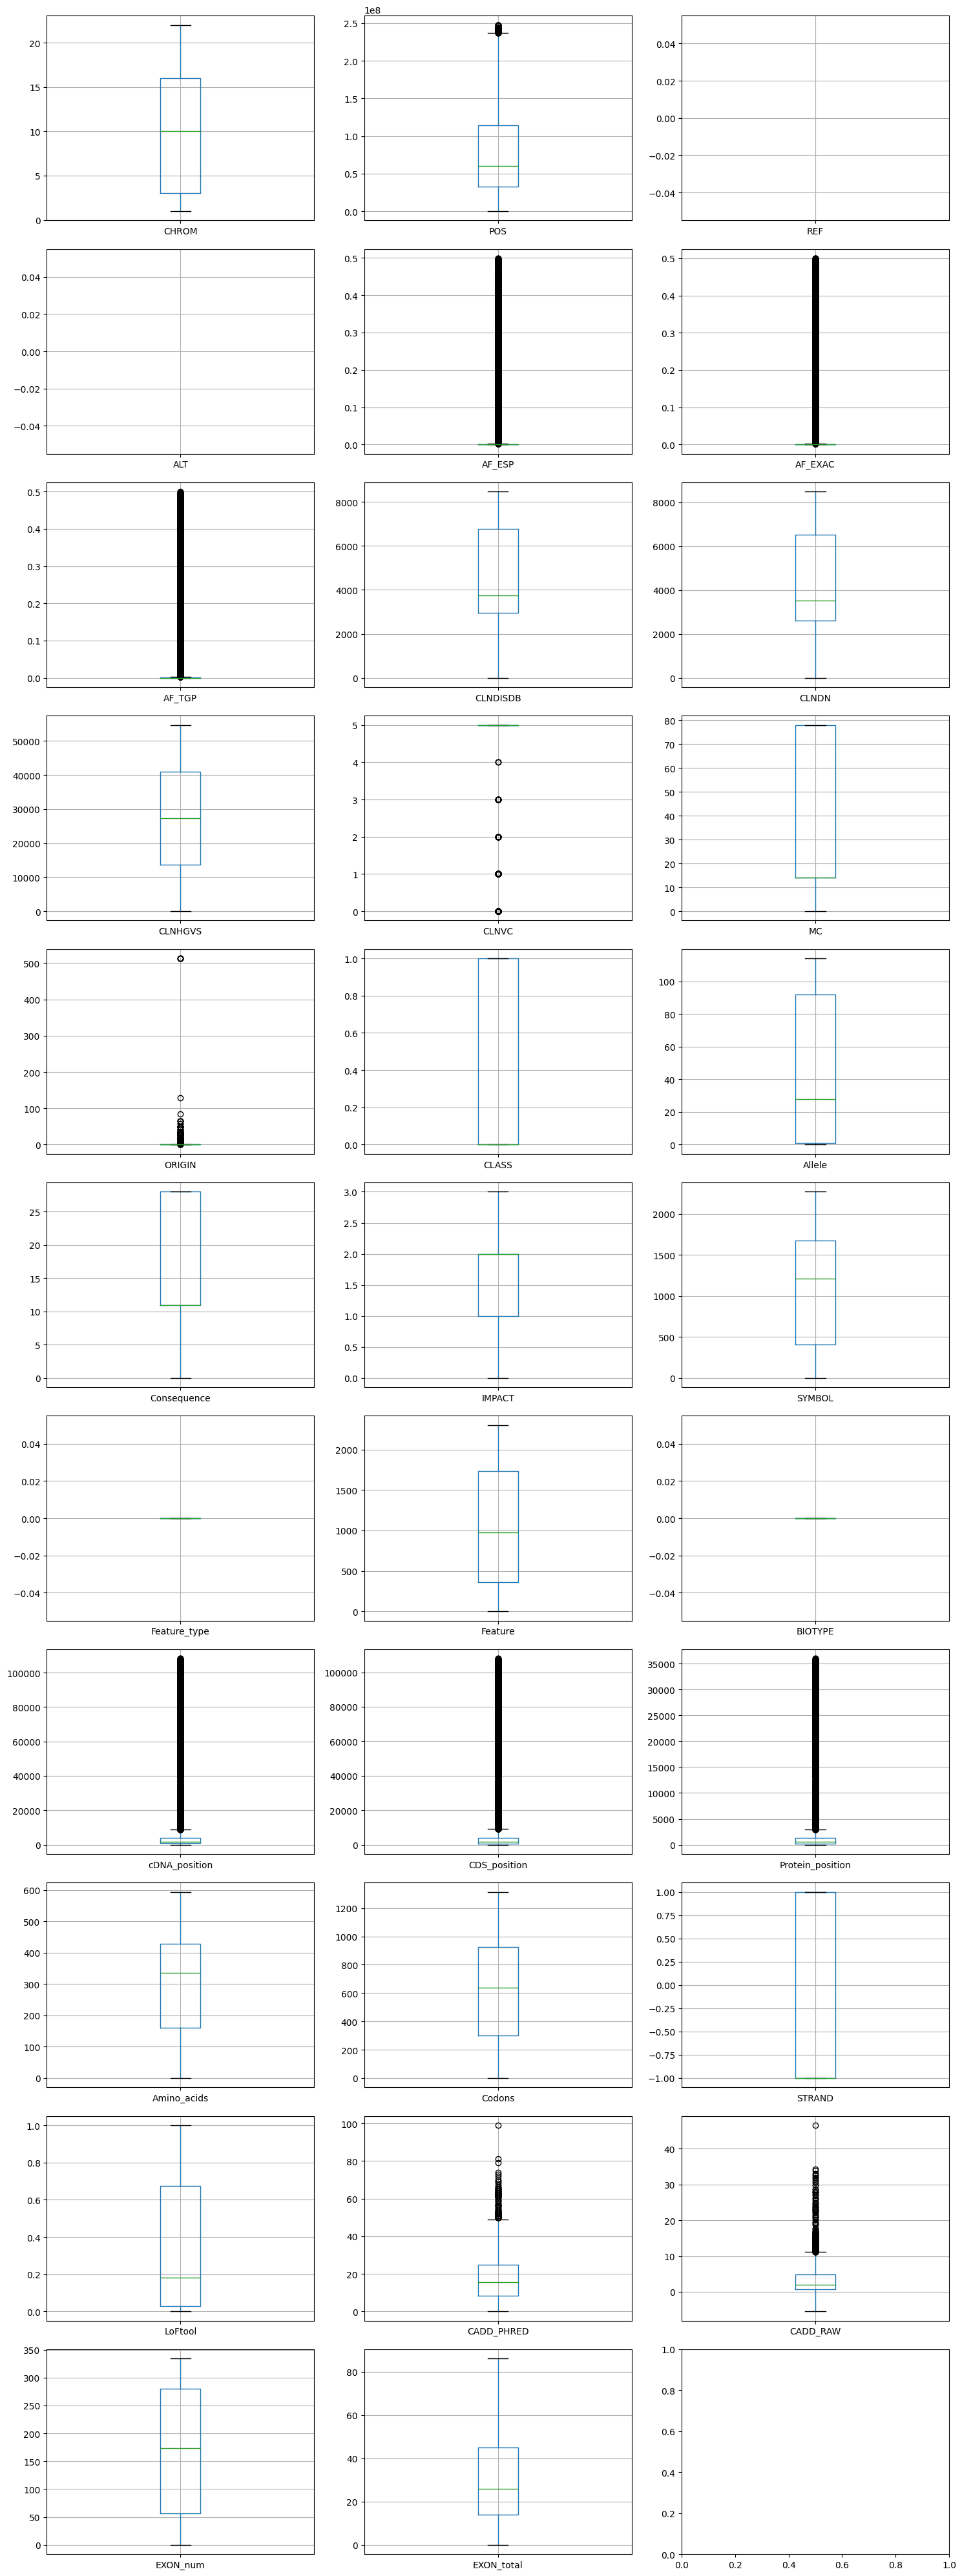

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt
#df_numeric = df.select_dtypes(include=['number'])
num_columns = 3
num_rows = (len(df.columns) - 1) // num_columns + 1
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 40))

# Iterate through columns and plot boxplots
for i, column in enumerate(df.columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row][col]

    df.boxplot(column=column, ax=ax)


# Adjust layout and display the plots
plt.tight_layout()
plt.show()

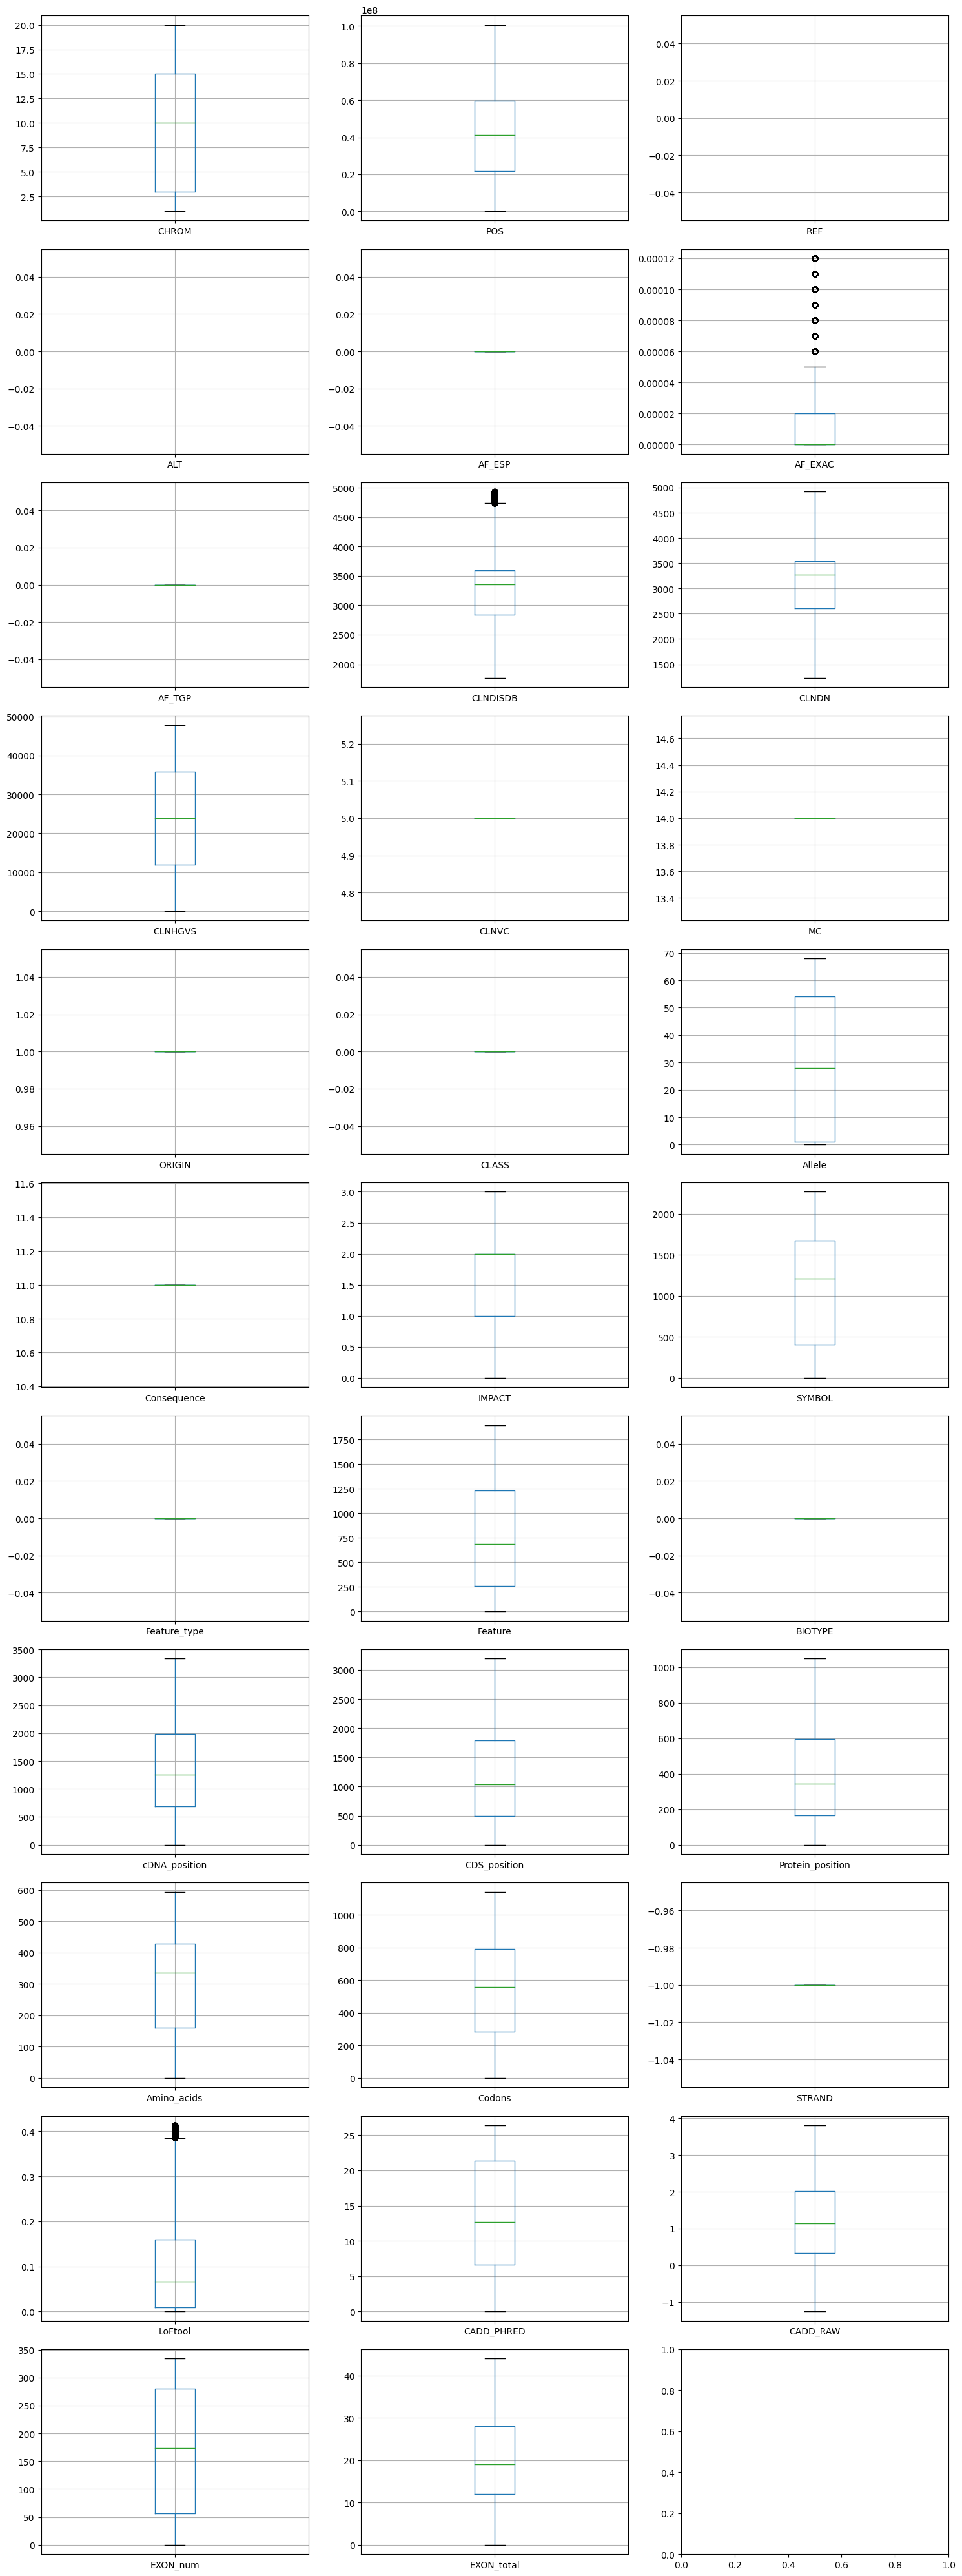

In [285]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.50)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column[(column >= lower_bound) & (column <= upper_bound)]

# Remove outliers for each column
df_clean = df.apply(remove_outliers, axis=0)

# Visualize box plots for clean data
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 40))

# Iterate through columns and plot boxplots
for i, column in enumerate(df_clean.columns):
    row = i // num_columns
    col = i % num_columns
    ax = axes[row][col]
    if column in df.columns:
       df_clean.boxplot(column=column, ax=ax)
    else:
       print(f"Column '{column}' not found in df_numeric")

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [286]:
from sklearn.preprocessing import  StandardScaler
sc=StandardScaler()
scaled_standard =sc.fit_transform(df_clean)
scaled_standard_df = pd.DataFrame(scaled_standard, columns=df_clean.columns)
print("\nStandardized Data:")
print(scaled_standard_df)


Standardized Data:
          CHROM       POS  REF  ALT  AF_ESP   AF_EXAC  AF_TGP  CLNDISDB  \
0     -1.410413 -1.437329  NaN  NaN     0.0 -0.568938     0.0       NaN   
1     -1.410413 -1.437318  NaN  NaN     NaN       NaN     NaN       NaN   
2     -1.410413 -1.436618  NaN  NaN     0.0       NaN     NaN       NaN   
3     -1.410413 -1.340619  NaN  NaN     NaN       NaN     NaN       NaN   
4     -1.410413 -1.340575  NaN  NaN     NaN       NaN     NaN       NaN   
...         ...       ...  ...  ...     ...       ...     ...       ...   
54662       NaN       NaN  NaN  NaN     NaN       NaN     NaN -0.581263   
54663       NaN       NaN  NaN  NaN     NaN       NaN     NaN       NaN   
54664       NaN       NaN  NaN  NaN     NaN       NaN     NaN       NaN   
54665       NaN       NaN  NaN  NaN     NaN       NaN     0.0       NaN   
54666       NaN       NaN  NaN  NaN     NaN       NaN     NaN       NaN   

          CLNDN   CLNHGVS  ...  CDS_position  Protein_position  Amino_acids  \


/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [287]:
df_sorted = scaled_standard_df.sort_values(by='POS')
print(df_sorted)

          CHROM       POS  REF  ALT  AF_ESP   AF_EXAC  AF_TGP  CLNDISDB  \
21289  1.093441 -1.556110  NaN  NaN     0.0 -0.568938     0.0       NaN   
47806 -0.408871 -1.554080  NaN  NaN     NaN       NaN     NaN       NaN   
47807 -0.408871 -1.554073  NaN  NaN     0.0       NaN     NaN       NaN   
51320 -0.075024 -1.553269  NaN  NaN     0.0 -0.568938     0.0       NaN   
43328 -0.742719 -1.553141  NaN  NaN     0.0       NaN     0.0       NaN   
...         ...       ...  ...  ...     ...       ...     ...       ...   
54662       NaN       NaN  NaN  NaN     NaN       NaN     NaN -0.581263   
54663       NaN       NaN  NaN  NaN     NaN       NaN     NaN       NaN   
54664       NaN       NaN  NaN  NaN     NaN       NaN     NaN       NaN   
54665       NaN       NaN  NaN  NaN     NaN       NaN     0.0       NaN   
54666       NaN       NaN  NaN  NaN     NaN       NaN     NaN       NaN   

          CLNDN   CLNHGVS  ...  CDS_position  Protein_position  Amino_acids  \
21289 -0.871363  1.1

In [288]:
df_sorted.columns

Index(['CHROM', 'POS', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNDISDB',
       'CLNDN', 'CLNHGVS', 'CLNVC', 'MC', 'ORIGIN', 'CLASS', 'Allele',
       'Consequence', 'IMPACT', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE',
       'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids',
       'Codons', 'STRAND', 'LoFtool', 'CADD_PHRED', 'CADD_RAW', 'EXON_num',
       'EXON_total'],
      dtype='object')

In [289]:
df_grouped_columns = df_sorted[['CHROM', 'POS', 'REF', 'ALT', 'AF_ESP', 'AF_EXAC', 'AF_TGP', 'CLNDISDB',
       'CLNDN', 'CLNHGVS', 'CLNVC', 'MC', 'ORIGIN', 'CLASS', 'Allele',
       'Consequence', 'IMPACT', 'SYMBOL', 'Feature_type', 'Feature', 'BIOTYPE',
       'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids',
       'Codons', 'STRAND', 'LoFtool', 'CADD_PHRED', 'CADD_RAW', 'EXON_num',
       'EXON_total']]

# Display vertically grouped DataFrame by columns
print("\nVertically Grouped DataFrame by Columns:")
print(df_grouped_columns)


Vertically Grouped DataFrame by Columns:
          CHROM       POS  REF  ALT  AF_ESP   AF_EXAC  AF_TGP  CLNDISDB  \
21289  1.093441 -1.556110  NaN  NaN     0.0 -0.568938     0.0       NaN   
47806 -0.408871 -1.554080  NaN  NaN     NaN       NaN     NaN       NaN   
47807 -0.408871 -1.554073  NaN  NaN     0.0       NaN     NaN       NaN   
51320 -0.075024 -1.553269  NaN  NaN     0.0 -0.568938     0.0       NaN   
43328 -0.742719 -1.553141  NaN  NaN     0.0       NaN     0.0       NaN   
...         ...       ...  ...  ...     ...       ...     ...       ...   
54662       NaN       NaN  NaN  NaN     NaN       NaN     NaN -0.581263   
54663       NaN       NaN  NaN  NaN     NaN       NaN     NaN       NaN   
54664       NaN       NaN  NaN  NaN     NaN       NaN     NaN       NaN   
54665       NaN       NaN  NaN  NaN     NaN       NaN     0.0       NaN   
54666       NaN       NaN  NaN  NaN     NaN       NaN     NaN       NaN   

          CLNDN   CLNHGVS  ...  CDS_position  Protein_pos

In [303]:

grouped_test1 = df_grouped_columns.groupby(['CLASS'],as_index=False).mean()
grouped_test1

,CLASS,CHROM,POS,REF,ALT,AF_ESP,AF_EXAC,AF_TGP,CLNDISDB,CLNDN,...,CDS_position,Protein_position,Amino_acids,Codons,STRAND,LoFtool,CADD_PHRED,CADD_RAW,EXON_num,EXON_total
0,0.0,0.008381,0.006954,NaN,NaN,0.0,-0.075207,0.0,0.004988,0.008039,...,0.00378,0.003442,0.008127,-0.004107,0.0,0.004347,-0.002075,-0.007364,0.005223,-0.031448


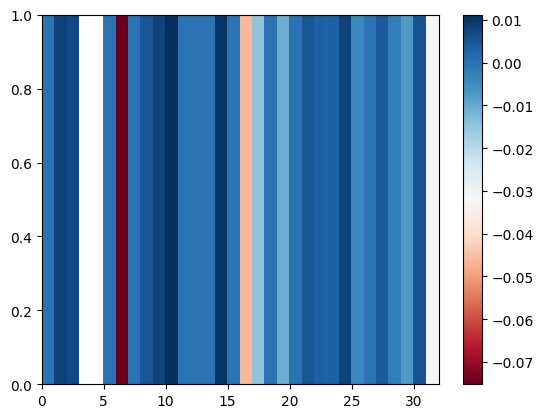

In [304]:
plt.pcolor(grouped_test1, cmap='RdBu')
plt.colorbar()
plt.show()